In [114]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Part 1: Data Exploration. 

In [148]:
# a) Load the scikit-learn diabetes bunch object into a variable.

diabetes = load_diabetes()

# b) Create a Pandas DataFrame from the bunch.
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

print(diabetes_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [119]:
# c) Construct a correlation matrix and document the order of correlations

correlation_matrix = diabetes_df.corr()


target_correlations = correlation_matrix['target'].sort_values(ascending=False)

print(target_correlations)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64



bmi: Body mass index has the strongest positive correlation with the target variable.

s5: A blood serum triglycerides level measurement shows a significant positive correlation.

bp: Blood pressure has a moderate positive correlation.

s4: total cholesterol has a moderate positive correlation.

s6: Blood sugar level shows a slight positive correlation.

s1: total serum cholestrol measurement has a weak positive correlation.

age: Age has a weak positive correlation.

s2: low-density lipoproteins has a weak positive correlation.

sex: Sex has a negligible positive correlation.

s3: high-density lipoproteins has the weakest negative correlation.

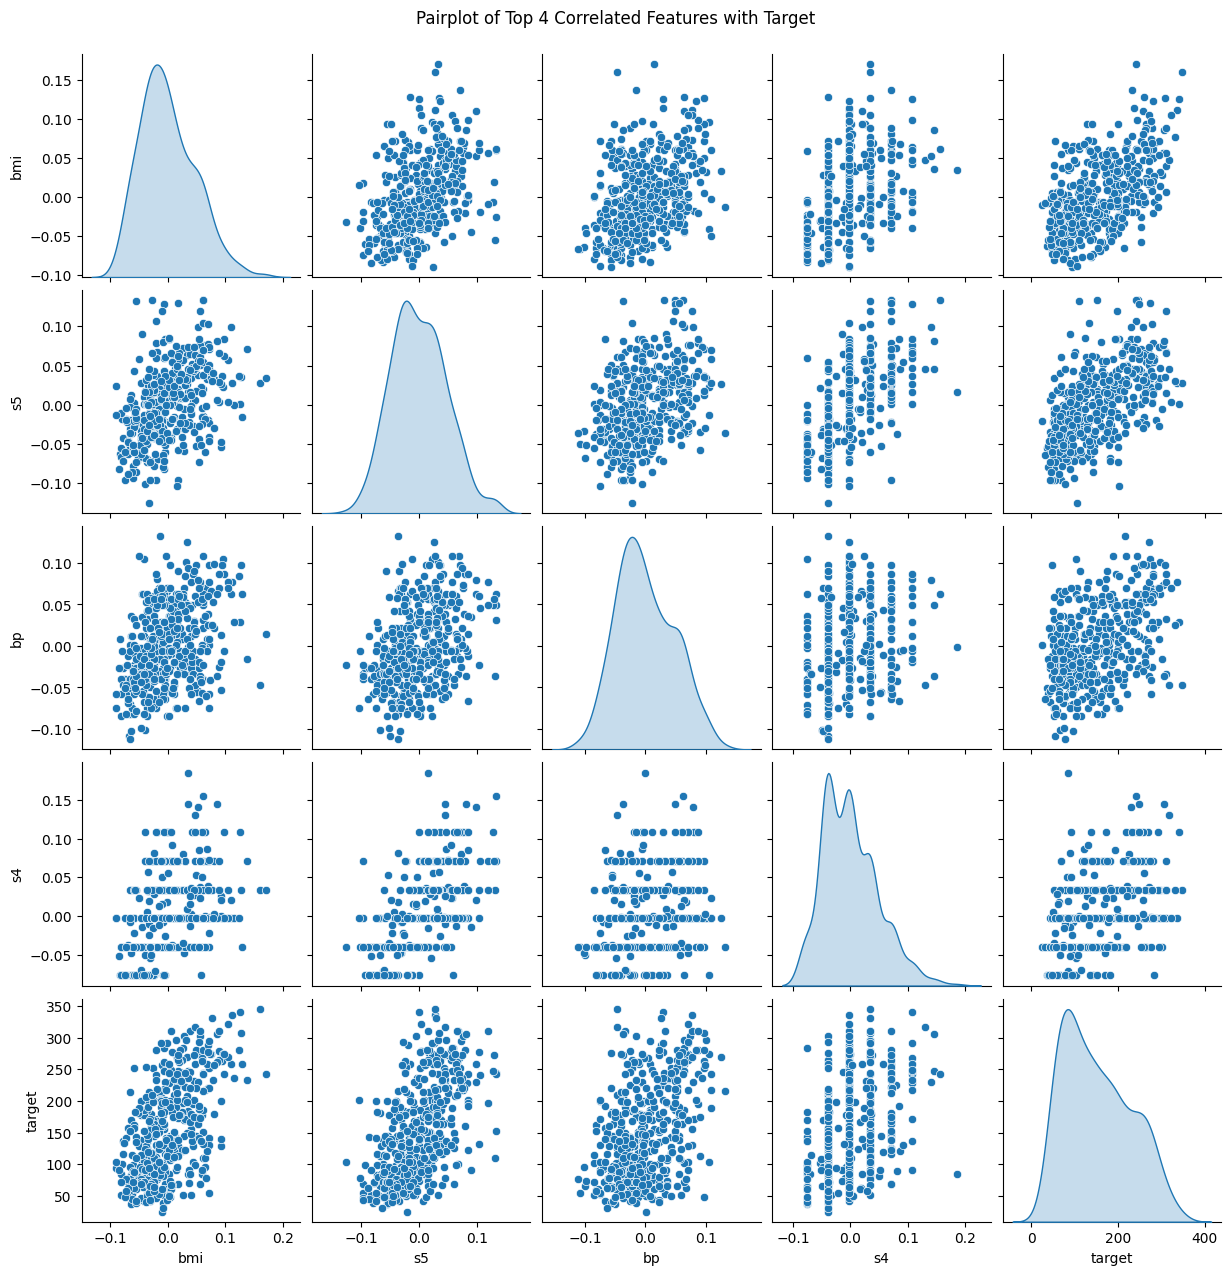

In [120]:
# d) Use a Seaborn pairplot to examine the scatter plots of the four features with the largest correlations to the 
# target.
# Create pairplot of top 4 correlated features with target
top_features = ['bmi', 's5', 'bp', 's4', 'target']
sns.pairplot(diabetes_df[top_features], diag_kind='kde')
plt.suptitle('Pairplot of Top 4 Correlated Features with Target', y=1.02)
plt.show()

In [155]:
# e) Partition the data into training and testing data sets using train_test_split.
# partition the data into training and testing data sets.
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print("\nDataset partitioning:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Dataset partitioning:
Training set shape: (353, 10)
Testing set shape: (89, 10)


Part 2: Model Training.

In [156]:
# Instantiate the linear regression model
lr_model = LinearRegression()

# Instantiate the DecisionTree model
dt_model = DecisionTreeRegressor(random_state=42)

# Instantiate the RandomForest model
rf_model = RandomForestRegressor(random_state=42)

In [157]:

# Full feature models
lr_scores = -cross_val_score(lr_model, X_train, y_train,
                             scoring='neg_root_mean_squared_error', cv=5)
dt_scores = -cross_val_score(dt_model, X_train, y_train,
                             scoring='neg_root_mean_squared_error', cv=5)
rf_scores = -cross_val_score(rf_model, X_train, y_train,
                             scoring='neg_root_mean_squared_error', cv=5)

models = {
    'Linear Regression (All Features)': lr_scores,
    'Decision Tree': dt_scores,
    'Random Forest': rf_scores
}

# BMI-only model
X_train_bmi = X_train[['bmi']]
bmi_scores = -cross_val_score(lr_model, X_train_bmi,
                              y_train, scoring='neg_root_mean_squared_error', cv=5)
models['Linear Regression (BMI only)'] = bmi_scores

# Print results for all models
for model_name, scores in models.items():
    print(f"\n{model_name}:")
    print(f"Scores: {scores}")
    print(f"Mean RMSE: {scores.mean():.3f}")
    print(f"Std RMSE: {scores.std():.3f}")


Linear Regression (All Features):
Scores: [52.53034465 58.93522481 52.08727478 56.50041896 59.80716652]
Mean RMSE: 55.972
Std RMSE: 3.184

Decision Tree:
Scores: [74.57079064 80.9946964  80.65148462 79.58391797 85.39036413]
Mean RMSE: 80.238
Std RMSE: 3.459

Random Forest:
Scores: [54.52038723 68.00166439 56.88656819 60.04114143 55.87601656]
Mean RMSE: 59.065
Std RMSE: 4.825

Linear Regression (BMI only):
Scores: [62.63654683 65.80955901 58.54772152 65.06090227 61.04527181]
Mean RMSE: 62.620
Std RMSE: 2.653


Part 3: Decision Tree Regressor Tuning. 

In [158]:
# Get parameters
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [159]:
# Define parameter grid
param_grid = {
    'max_depth': np.arange(1, 20),  # 1-19
    'min_samples_leaf': np.arange(1, 51)  # 1-50
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
print("\nPerforming  decision tree grid search...")
grid_search.fit(X_train, y_train)



Performing  decision tree grid search...


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='neg_root_mean_squared_error')

In [126]:
# Display the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 2, 'min_samples_leaf': 1}
Best Score: -61.26383483081285


In [127]:
# Extract hyperparameter values and their corresponding RMSE scores
cv_results = grid_search.cv_results_
params = cv_results['params']
rmse_scores = -cv_results['mean_test_score']

# DataFrame to display the hyperparameter settings and their RMSE values
results_dt = pd.DataFrame(params)
results_dt['RMSE'] = rmse_scores

# Print
print(results_dt.head())

   max_depth  min_samples_leaf       RMSE
0          1                 1  66.774849
1          1                 2  66.774849
2          1                 3  66.774849
3          1                 4  66.774849
4          1                 5  66.774849


Part 4: Random Forest Regressor Tuning. 

In [137]:
# a) Print the default parameters of the Random Forest Regressor
# Get parameters
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [136]:
# b) Conduct a grid search using GridSearchCV
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 400, 500],
    'max_features': [2, 4, 6, 8, 10]
}

# Create GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit the grid search
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 400, 500]},
             scoring='neg_root_mean_squared_error')

In [160]:
# c) Print the best hyperparameter settings and best score
# Display the best parameters and best score
best_params = rf_grid_search.best_params_
best_score = -rf_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_features': 4, 'n_estimators': 200}
Best Score: 57.57507001282626


In [161]:
# d) Pair hyperparameter values with corresponding RMSE scores
# Access the cv_results_ dictionary
rf_cv_results = grid_search.cv_results_

# Pair hyperparameter values with their corresponding RMSE scores
for params, mean_score in zip(rf_cv_results['params'], rf_cv_results['mean_test_score']):
    print(f"Hyperparameters: {params}, RMSE: {-mean_score}")

Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 1}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 2}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 3}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 4}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 5}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 6}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 7}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 8}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 9}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 10}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 11}, RMSE: 66.77484860968592
Hyperparameters: {'max_depth': 1, 'min_samples_leaf': 12}, RMSE: 66.77484860968592
Hyperparamete

In [162]:
# e) Identify Feature Importances and Pair with Feature Names
# Get the best estimator

best_rf_model = rf_grid_search.best_estimator_


# Extract feature importances

feature_importances = best_rf_model.feature_importances_


# Pair feature names with importance values

feature_importance_df = pd.DataFrame({

    'Feature': X.columns,

    'Importance': feature_importances

}).sort_values(by='Importance', ascending=False)


print(feature_importance_df)



  Feature  Importance
2     bmi    0.276136
8      s5    0.205969
3      bp    0.113577
9      s6    0.081539
6      s3    0.072997
5      s2    0.064550
4      s1    0.059292
0     age    0.059107
7      s4    0.055029
1     sex    0.011804


In [163]:
print(feature_importance_df)

print(target_correlations)

  Feature  Importance
2     bmi    0.276136
8      s5    0.205969
3      bp    0.113577
9      s6    0.081539
6      s3    0.072997
5      s2    0.064550
4      s1    0.059292
0     age    0.059107
7      s4    0.055029
1     sex    0.011804
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


Both methods identify BMI as the most important feature, while ,s5 and bp are also highly ranked in both metrics.

Feature s3 has low importance in the Random Forest model but has a negative correlation with the target suggesting that while it has a linear relationship with the target, it may not contribute significantly to the model's predictive power when combined with other features.

This shows that correlation matrix helps identify linear relationships while feature importances reveal which features are most influential in the model's predictions, considering both non-linearities and interactions.



Part 5: Model Evaluation and Selection

In [164]:

# Sort models by performance
models = {
    'Linear Regression (All features)': lr_scores.mean(),
    'Decision Tree': dt_scores.mean(),
    'Random Forest': rf_scores.mean(),
    'Linear Regression (BMI only)': bmi_scores.mean()
}

print("Models Ranked by Performance:")
for model, rmse in sorted(models.items(), key=lambda x: x[1]):
    print(f"{model}: {rmse:.3f}")

Models Ranked by Performance:
Linear Regression (All features): 55.972
Random Forest: 59.065
Linear Regression (BMI only): 62.620
Decision Tree: 80.238


Linear Regression (All features) performs best with the lowest RMSE.This suggests that the relationships between features and target are predominantly linear.

Random Forest RMSE is very close to linear regression performance. This suggests that non-linear relationships exist but aren't dominant.

Linear Regression with BMI only RMSE of 62.620 confirms BMI's strong predictive power identified in correlation and feature importance analyses.

Decision Tree performs Significantly worse than other models  indicating that it likely overfit to the training data and generalized poorly.

In [169]:

# Sort by RMSE to see best performing combinations
results_df = results_dt.sort_values('RMSE')

# Identify the best hyperparameters (with the lowest RMSE)
best_dt_params = grid_search.best_params_
best_dt_rmse = -grid_search.best_score_

# Print the best parameters and best RMSE score
print("Best Decision Tree Hyperparameters:", best_dt_params)
print("Best Negative RMSE Score:", best_dt_rmse)

# Print head (best & worst performing combinations)
print("\nBest Performing Combinations:")
print(results_df)

Best Decision Tree Hyperparameters: {'max_depth': 2, 'min_samples_leaf': 1}
Best Negative RMSE Score: 61.26383483081285

Best Performing Combinations:
     max_depth  min_samples_leaf       RMSE
67           2                18  61.263835
50           2                 1  61.263835
51           2                 2  61.263835
52           2                 3  61.263835
53           2                 4  61.263835
..         ...               ...        ...
600         13                 1  80.086988
450         10                 1  80.126040
900         19                 1  80.238251
700         15                 1  80.742979
500         11                 1  81.049933

[950 rows x 3 columns]


Best Performance (RMSE = 61.26) with optimal max_depth of 2 and optimal min_samples_leaf of 1.

All top 5 combinations have max_depth = 2 with min_samples_leaf varying between 1-18 with a very similar RMSE valuessuggesting that the model is stable.

Worst Performance (RMSE > 80):
All worst performers have min_samples_leaf = 1, high max_depth values (11-19) with RMSE about 20 points worse than best performer.

Therefore, tuned Decision Tree Model  performs better than Linear Regression using only BMI  and Decision Tree model but is outperfomed by Linear Regression (All features) and Random Forest.

In [170]:
# Sort by RMSE to see best and worst performing combinations
rf_results_df = rf_results_df.sort_values('RMSE')

# Print best parameters and score
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)
print("Best RMSE Score: {:.3f}".format(rf_results_df['RMSE'].min()))

# Print best & worst performing combinations
print("\nWorst Performing Combinations:")
print(rf_results_df)


Best Random Forest Hyperparameters: {'max_features': 4, 'n_estimators': 200}
Best RMSE Score: 57.575

Worst Performing Combinations:
    max_features  n_estimators       RMSE
5              4           200  57.575070
4              4           100  57.654320
6              4           400  57.666695
7              4           500  57.699352
11             6           500  57.711836
9              6           200  57.733429
10             6           400  57.789093
8              6           100  57.945625
3              2           500  57.984527
2              2           400  58.049023
1              2           200  58.137679
15             8           500  58.183681
14             8           400  58.233067
19            10           500  58.384630
18            10           400  58.508522
13             8           200  58.563632
0              2           100  58.649453
17            10           200  58.734459
12             8           100  58.922178
16            10           

Tuned Random Forest (RMSE = 57.575) performs better than Random Fores, tuned Decision Tree Model  , BMI-only Linear Regression  and Decision Tree .

Linear Regression  (All features) with (RMSE = 55.972) remains the best performing model.


Linear Regression  (All features) remains the best perfoming model with (RMSE = 55.972). This suggests that the relationships in the diabetes progression data are predominantly linear, making the Linear Regression model the most appropriate choice for this  prediction task.

In [173]:
# Train Linear Regression on full training set
lr_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = lr_model.predict(X_test)

# Calculate RMSE on test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Get training RMSE from cross-validation 
train_cv_rmse = lr_scores.mean()

print("Linear Regression Model Performance Comparison:")

print(f"Average Training RMSE (from CV): {train_cv_rmse:.3f}")
print(f"Test Set RMSE: {test_rmse:.3f}")


Linear Regression Model Performance Comparison:
Average Training RMSE (from CV): 55.972
Test Set RMSE: 53.853


The model performs better on the test set than the average cross-validation performance, indicating that it generalizes well to unseen data. This suggests that the model is not overfitting and is robust in its predictions.